In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf


In [2]:
data = yf.download('EURUSD=X', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0
2003-12-08,1.216797,1.224005,1.215407,1.222001,0
2003-12-09,1.222105,1.227702,1.219795,1.224995,0
2003-12-10,1.224905,1.226603,1.216205,1.219096,0
2003-12-11,1.219096,1.223496,1.212298,1.222404,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4701 entries, 2003-12-01 to 2022-01-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4701 non-null   float64
 1   High    4701 non-null   float64
 2   Low     4701 non-null   float64
 3   Close   4701 non-null   float64
 4   Volume  4701 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 220.4 KB


In [5]:
data.shape

(4701, 5)

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,4701.000000,4701.000000,4701.000000,4701.000000,4701.0
mean,1.255200,1.259893,1.250058,1.255226,0.0
std,0.119040,0.119801,0.119599,0.119029,0.0
min,1.039393,1.041992,0.072902,1.039047,0.0
25%,1.155535,1.159326,1.151410,1.155535,0.0
50%,1.246261,1.251142,1.240064,1.246199,0.0
75%,1.339405,1.343797,1.334401,1.339208,0.0
max,1.598184,1.602821,1.587402,1.598798,0.0


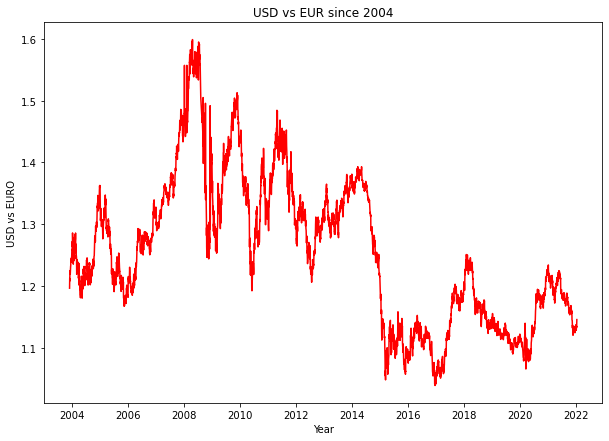

In [7]:
plt.figure(figsize=(10,7))
plt.plot(data['Close'], 'r')
plt.xlabel('Year')
plt.ylabel('USD vs EURO')
plt.title('USD vs EUR since 2004')

plt.show()

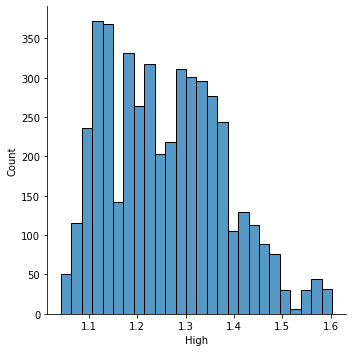

In [8]:
sns.displot(data.High)

In [9]:
X = data.drop('Close', axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3760, 4)
(3760,)
(941, 4)
(941,)


In [10]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def cal_met(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MSE : ',mse)
    print('R2 : ',r2)
    
cal_met(y_test, pred1)

MSE :  3.797438423874541e-05
R2 :  0.9972308991205399


In [12]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [13]:
cal_met(y_test, la_p)

MSE :  0.013718055936814777
R2 :  -0.000323810921988521


In [14]:
cal_met(y_test, ri_p)

MSE :  0.0002035034882019125
R2 :  0.9851604785844515


In [19]:
X_test.shape

(941, 4)

In [20]:
y_test.shape

(941,)